In [1]:
from MHW_daily_calcs import *
import matplotlib.pyplot as plt
import cmocean
import itertools

SEDI was higher, particularly for tropical Pacific, when no smoothing was applied. Try to identify cause. First, compare detrended anomaly time series.

In [2]:
climyrs=[1993,2023]
qtile=0.90
detr=True
#smoothClim=True
smoothTrend=True
meth=method
win=halfwin
qtvar='qt1'
delt=15
jj=60
p1=[145,146,90-60,91-60] # points edded to p4 values

In [3]:
fanom=dict()
fMHW=dict()
fQ=dict()
pselect= lambda ds: ds.isel(lat=p1[2],lon=p1[0])
fanom['obs','sm','det']=xr.open_mfdataset([fnameOISSTAnomDetr([ylimlistobs[0][0],ylimlistobs[-1][-1]],climyrs, jj, smoothClim=True, meth=meth, win=win),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','sm','nod']=xr.open_mfdataset([fnameOISSTAnom(yrlims, climyrs, jj, smoothClim=True, meth=meth, win=win) for yrlims in ylimlistobs],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','id','det']=xr.open_mfdataset([fnameOISSTAnomDetr([ylimlistobs[0][0],ylimlistobs[-1][-1]],climyrs, jj, smoothClim=False, meth=None, win=1),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','id','nod']=xr.open_mfdataset([fnameOISSTAnom(yrlims, climyrs, jj, smoothClim=False, meth=None, win=1) for yrlims in ylimlistobs],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','sm','det']=xr.open_mfdataset([fnameCanESMAnomDetrByLead(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=True,
                                                        smoothTrend=True,meth=meth,win=win) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','sm','nod']=xr.open_mfdataset([fnameCanESMAnomByLeadNoDetr(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=True,
                                                                       meth=meth,win=win) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','id','det']=xr.open_mfdataset([fnameCanESMAnomDetrByLead(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=False,
                                                        smoothTrend=False,meth=None,win=1) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','id','nod']=xr.open_mfdataset([fnameCanESMAnomByLeadNoDetr(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=False,
                                                                       meth=None,win=1) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)


In [4]:

fMHW['obs','sm','det']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=True,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','sm','nod']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=False,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','id','det']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=True,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','id','nod']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=False,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
lmax=100
fMHW['mod','sm','det']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=True,smoothClim=True,
                                            smoothTrend=True,meth=meth,win=win,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','sm','nod']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=False,smoothClim=True,
                                            smoothTrend=True,meth=meth,win=win,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','id','det']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=True,smoothClim=False,
                                            smoothTrend=False,meth=None,win=1,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','id','nod']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=False,smoothClim=False,
                                            smoothTrend=False,meth=None,win=1,delt=delt,qtvar='qt1')  for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)

In [5]:
fQ['obs','sm','det']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=True,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','sm','nod']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=False,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','id','det']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=True,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','id','nod']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=False,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
lmax=100
fQ['mod','sm','det']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=True,smoothClim=True,
                                smoothTrend=True,meth=meth,win=win,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','sm','nod']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=False,smoothClim=True,
                                smoothTrend=True,meth=meth,win=win,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','id','det']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=True,smoothClim=False,
                                smoothTrend=False,meth=None,win=1,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','id','nod']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=False,smoothClim=False,
                                smoothTrend=False,meth=None,win=1,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)

In [6]:
sstan=dict()
mhw=dict()
Q=dict()
keylist=[('obs','sm','det'),
         ('obs','sm','nod'),
         ('obs','id','det'),
         ('obs','id','nod'),
         ('mod','sm','det'),
         ('mod','sm','nod'),
         ('mod','id','det'),
         ('mod','id','nod'),]
for key in keylist:
    print(key)
    sstan[key]=fanom[key].sst_an.load()
    mhw[key]=fMHW[key].MHW_prob.load() if key[0]=='mod' else fMHW[key].isMHW.load()
    Q[key]=fQ[key].qt1.load()

('obs', 'sm', 'det')
('obs', 'sm', 'nod')
('obs', 'id', 'det')
('obs', 'id', 'nod')
('mod', 'sm', 'det')
('mod', 'sm', 'nod')
('mod', 'id', 'det')
('mod', 'id', 'nod')


In [7]:
fanom['obs','sm','det'].time
tobs=np.array([dt.datetime(1978,1,1,12)+dt.timedelta(days=float(ii)) for ii in fanom['obs','sm','det'].time.values])
ydobs=np.array([yd365(el) for el in tobs]) # day 366 is returned as 365

(np.float64(8401.0), np.float64(19783.0))

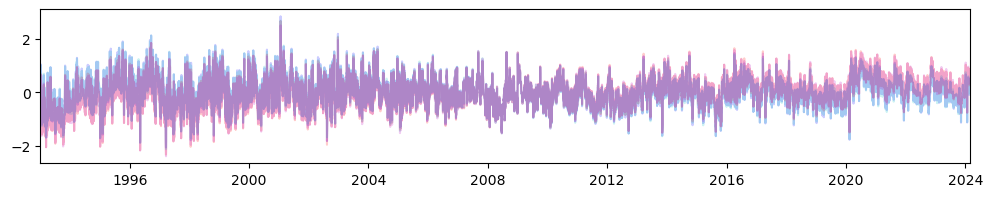

In [8]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(2024,3,1))

(np.float64(8401.0), np.float64(19783.0))

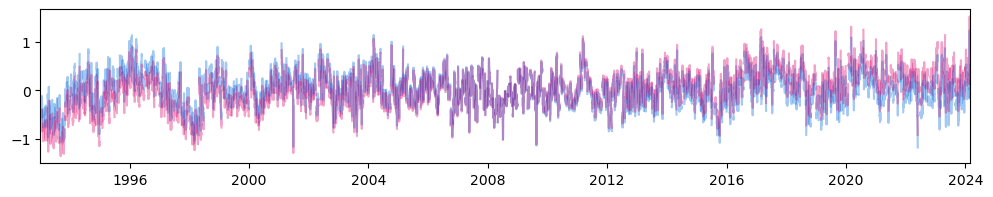

In [9]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(2024,3,1))

(-1.1, 1.5)

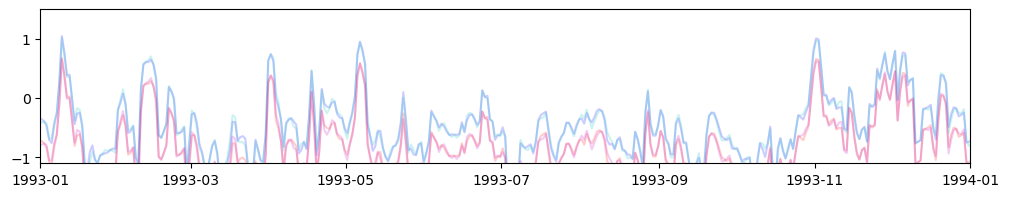

In [10]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(1994,1,1))
ax.set_ylim(-1.1,1.5)

(-1.1, 1.5)

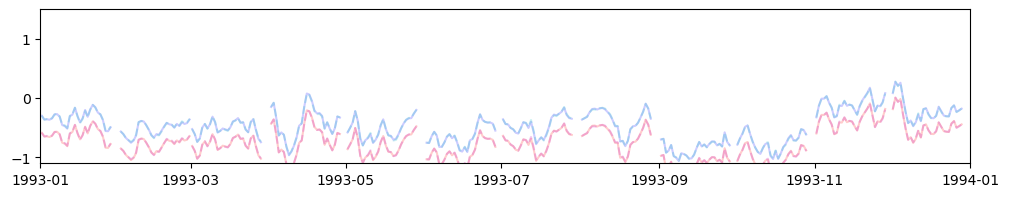

In [11]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(1994,1,1))
ax.set_ylim(-1.1,1.5)

(-1.0, 1.3)

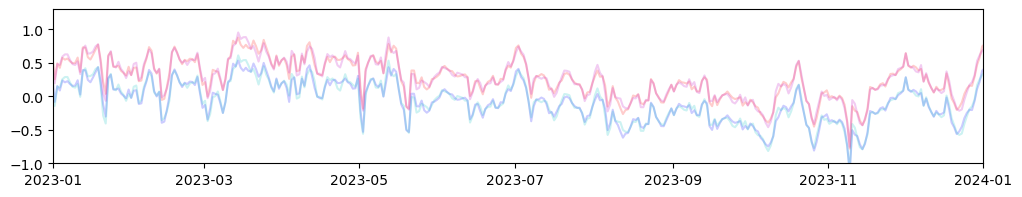

In [12]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(dt.datetime(2023,1,1),dt.datetime(2024,1,1))
ax.set_ylim(-1,1.3)

(-1.0, 1.3)

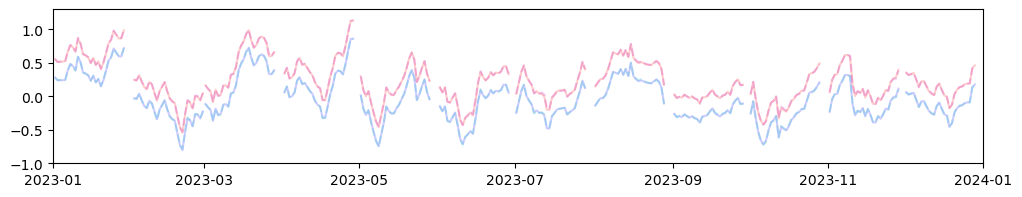

In [13]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(dt.datetime(2023,1,1),dt.datetime(2024,1,1))
ax.set_ylim(-1,1.3)


MHW


(np.float64(8401.0), np.float64(19783.0))

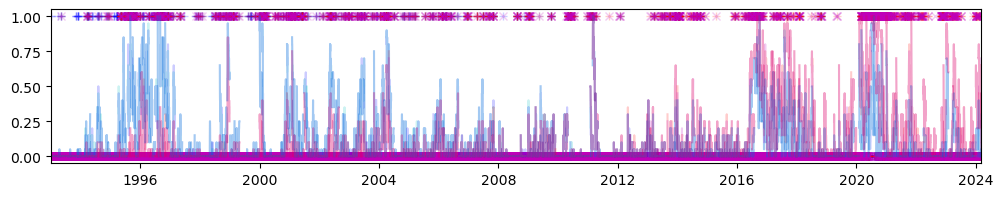

In [14]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det'],'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod'],'r+',alpha=.2)
#ax.plot(tobs,mhw['obs','id','det'],'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod'],'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(2024,3,1))

/tmp/reo000/1838413/ipykernel_2686589/2219761213.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(1,1,figsize=(12,2))


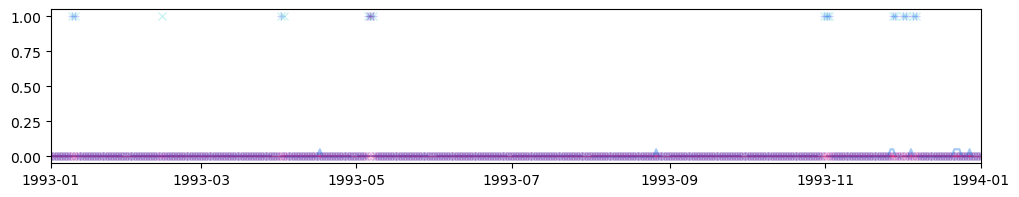

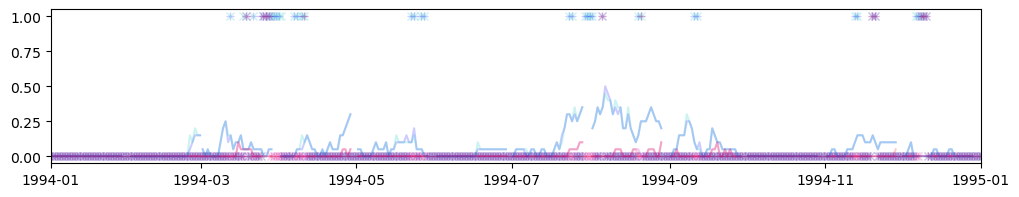

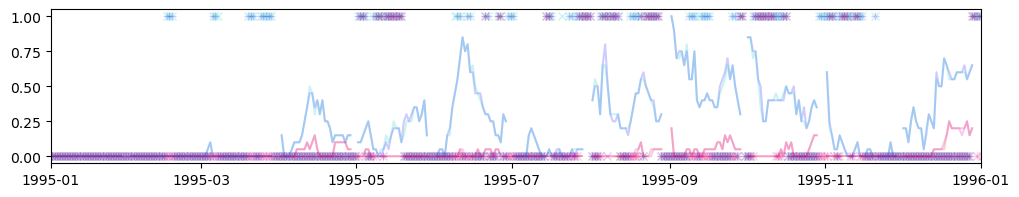

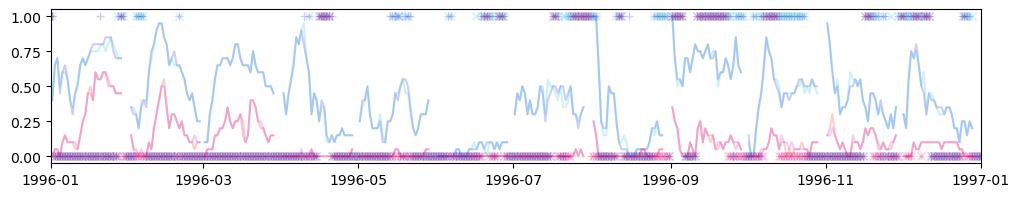

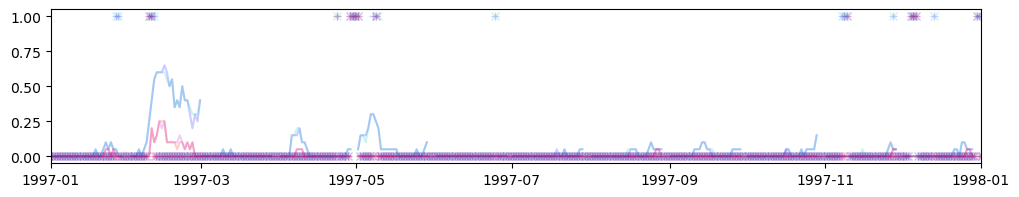

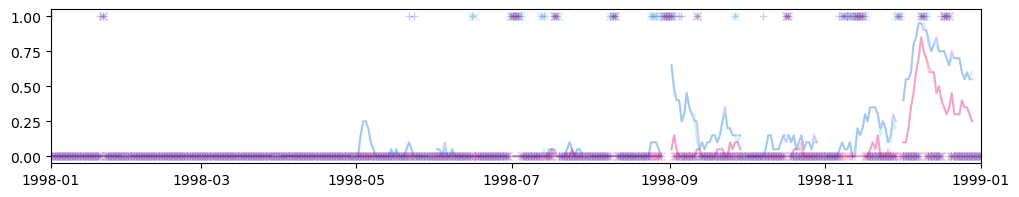

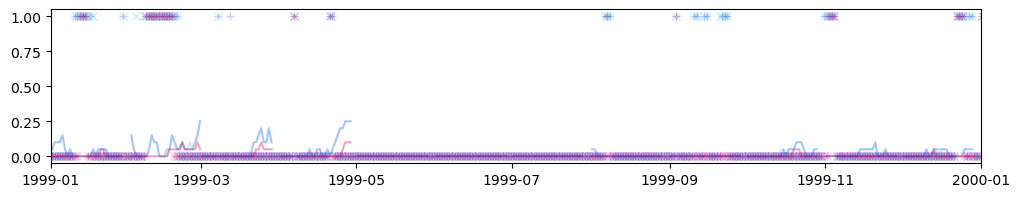

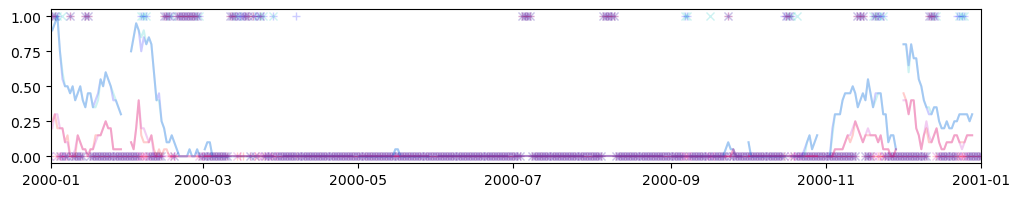

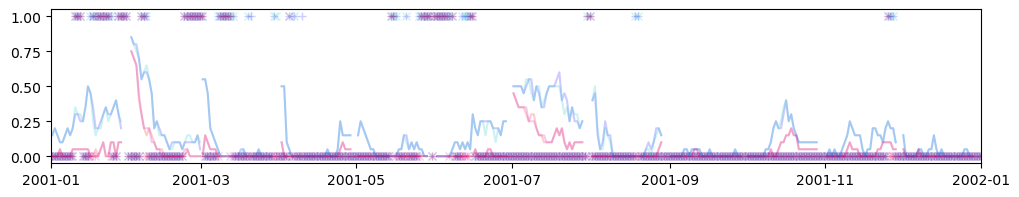

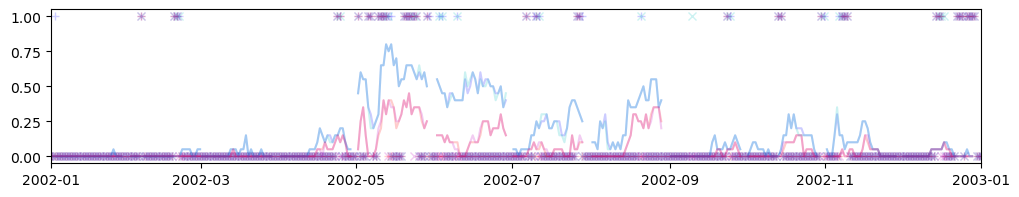

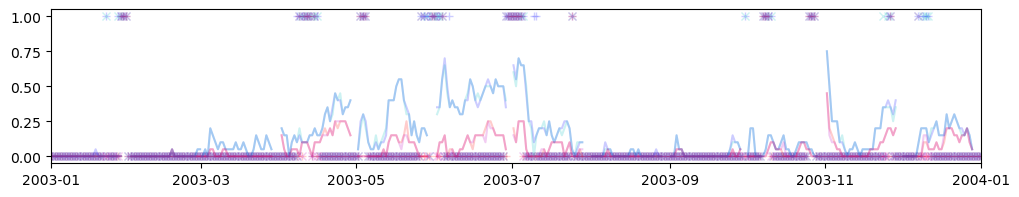

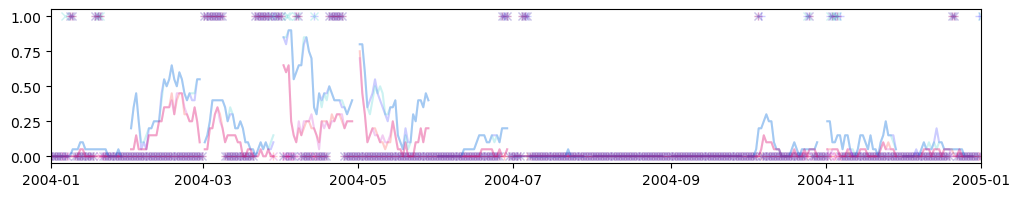

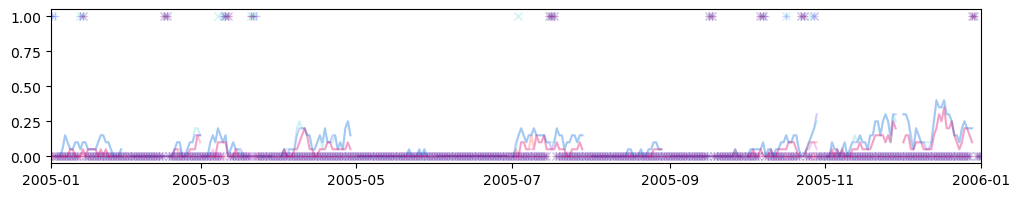

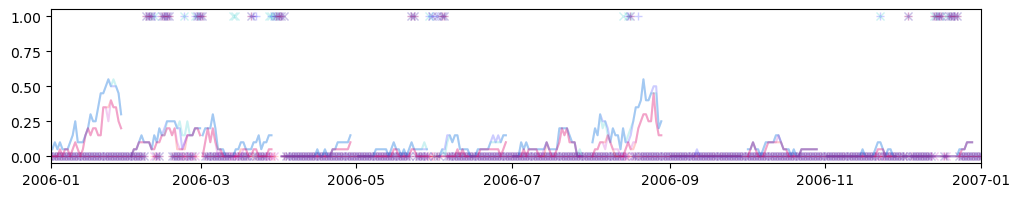

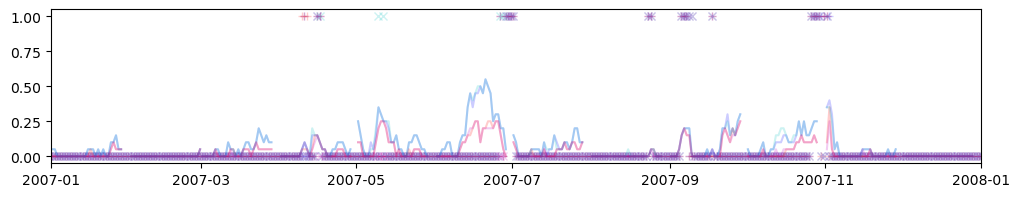

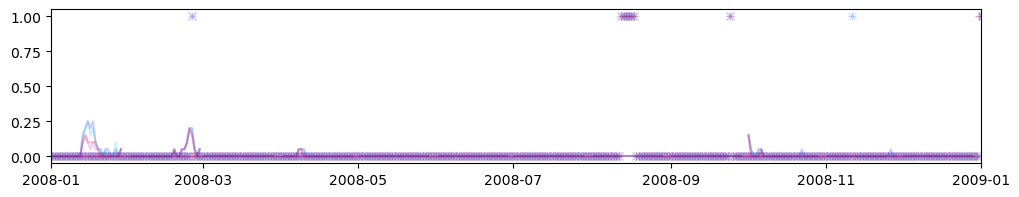

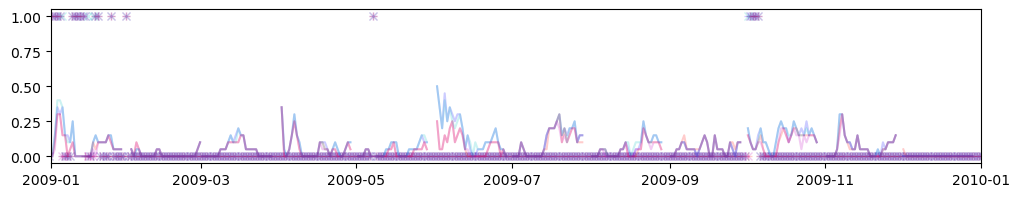

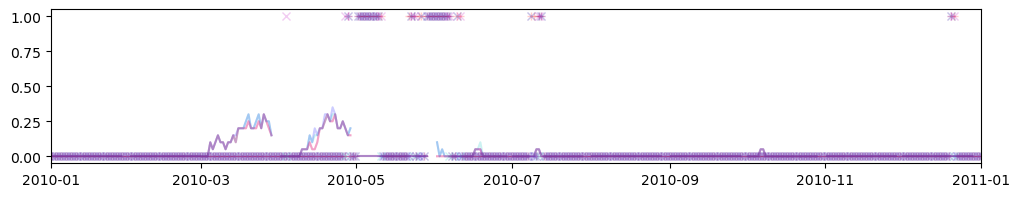

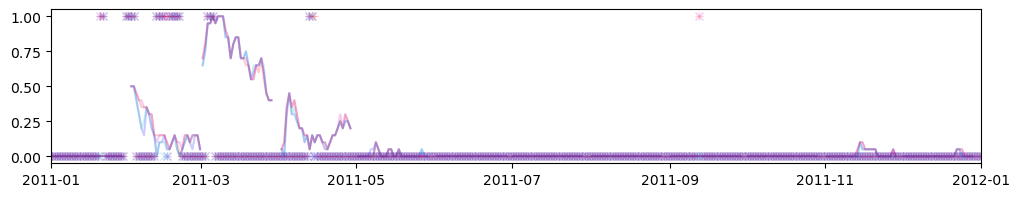

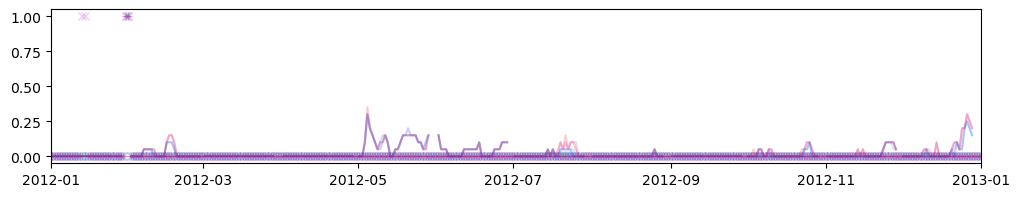

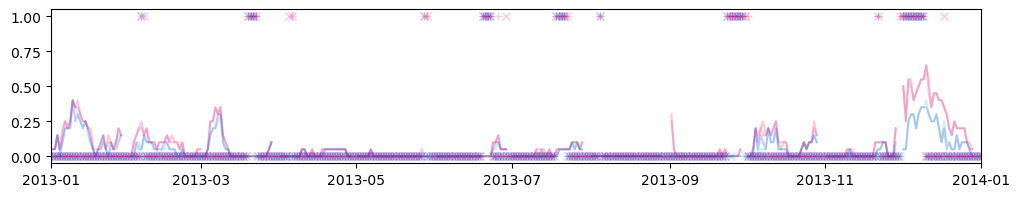

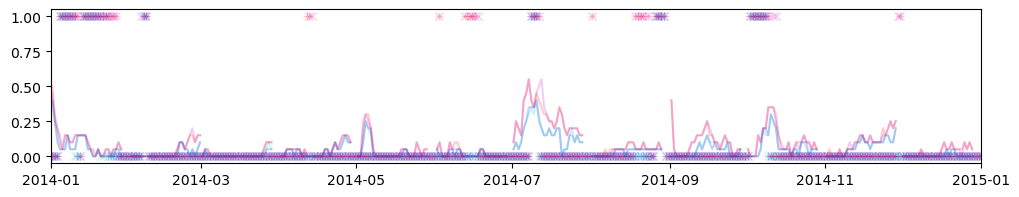

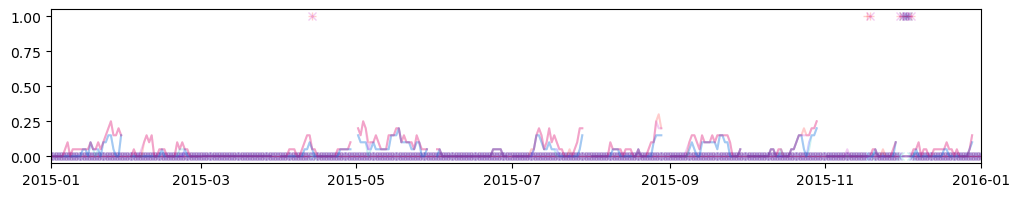

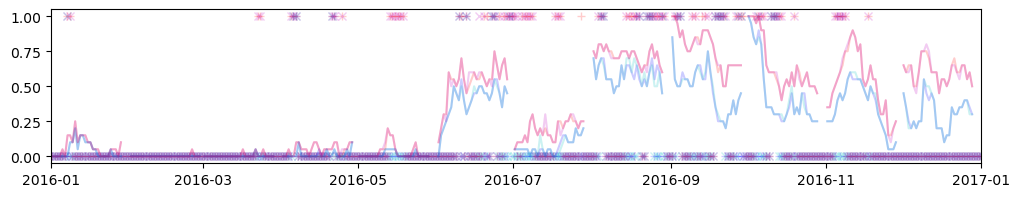

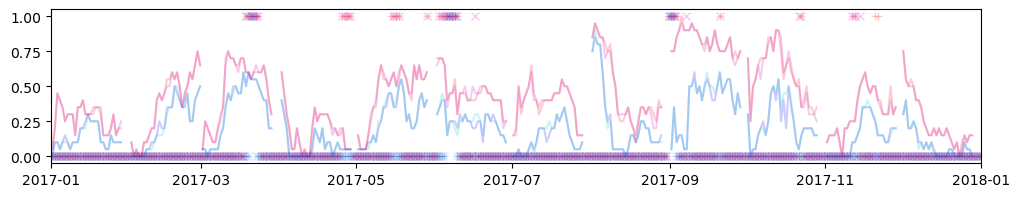

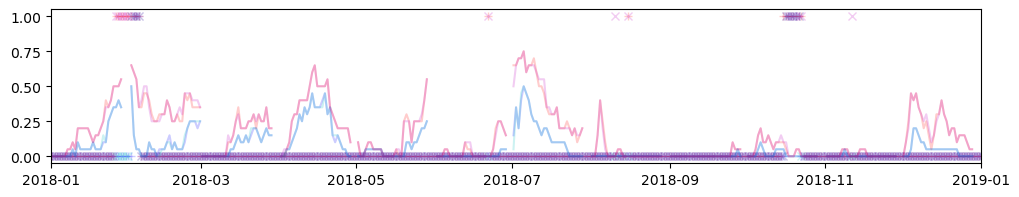

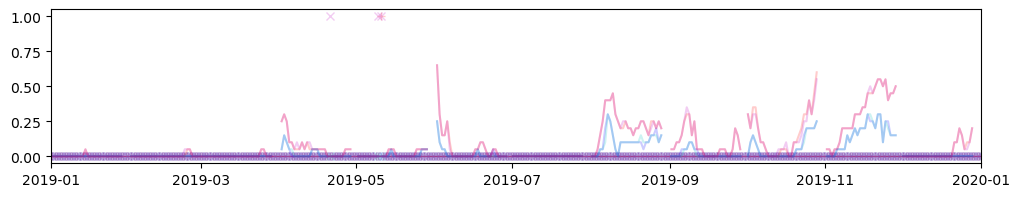

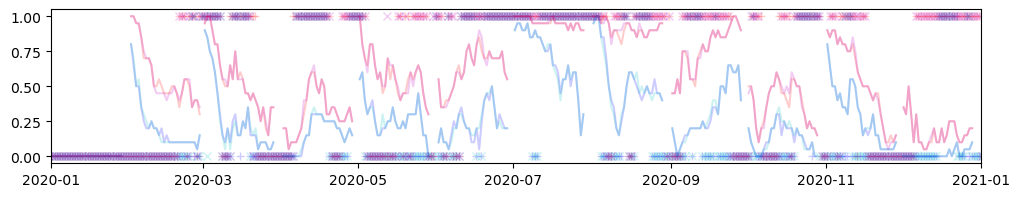

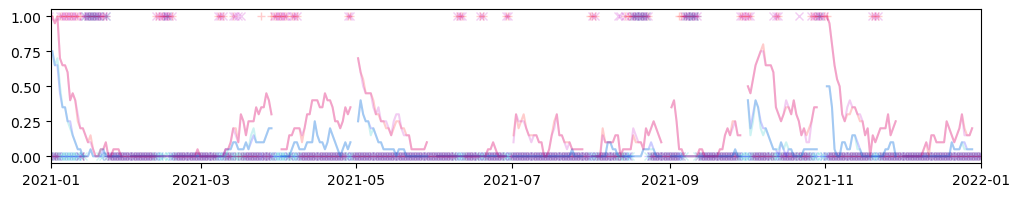

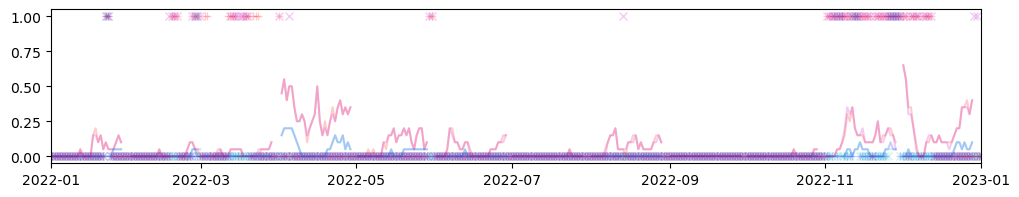

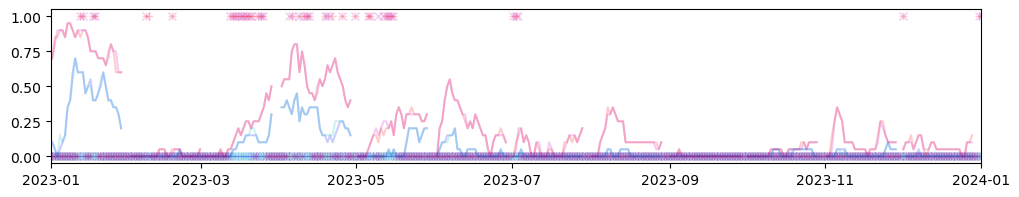

In [15]:
for yr0 in range(1993,2024):
    fig,ax=plt.subplots(1,1,figsize=(12,2))
    ax.plot(tobs,mhw['obs','sm','det'],'b+',alpha=.2)
    ax.plot(tobs,mhw['obs','sm','nod'],'r+',alpha=.2)
    ax.plot(tobs,mhw['obs','id','det'],'cx',alpha=.2)
    ax.plot(tobs,mhw['obs','id','nod'],'mx',alpha=.2)
    for ir in range(0,378):
        tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
        tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
        ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
        ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
        ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
        ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
    ax.set_xlim(dt.datetime(yr0,1,1),dt.datetime(yr0+1,1,1))

Text(0.5, 1.0, 'Mod SST_an')

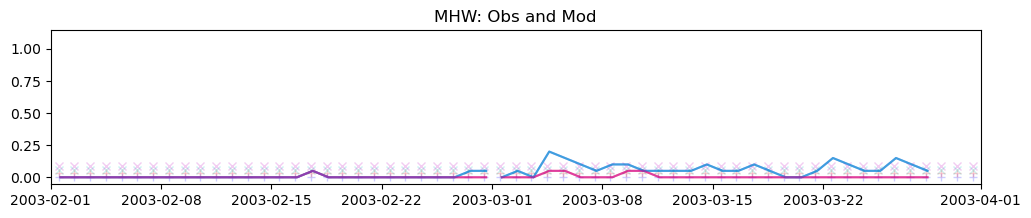

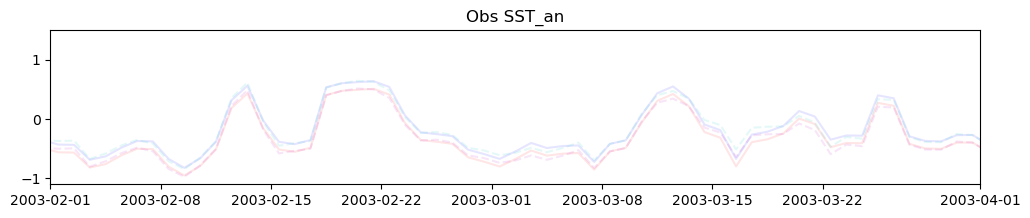

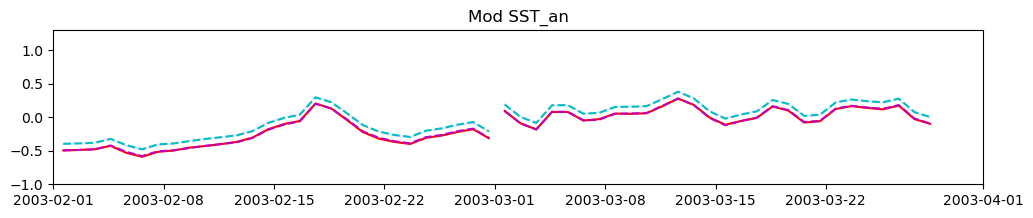

In [16]:
xl=[dt.datetime(2003,2,1),dt.datetime(2003,4,1)]
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod']+0.03,'r+',alpha=.2)
ax.plot(tobs,mhw['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod']+0.09,'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.5)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.5)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c--',alpha=.5)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m--',alpha=.5)
ax.set_xlim(xl)
ax.set_title('MHW: Obs and Mod')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.1)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.1)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c--',alpha=.1)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m--',alpha=.1)
ax.set_xlim(xl)
ax.set_ylim(-1.1,1.5)
ax.set_title('Obs SST_an')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.1)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=1)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=1)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=1)
ax.set_xlim(xl)
ax.set_ylim(-1,1.3)
ax.set_title('Mod SST_an')

Text(0.5, 1.0, 'Mod SST_an')

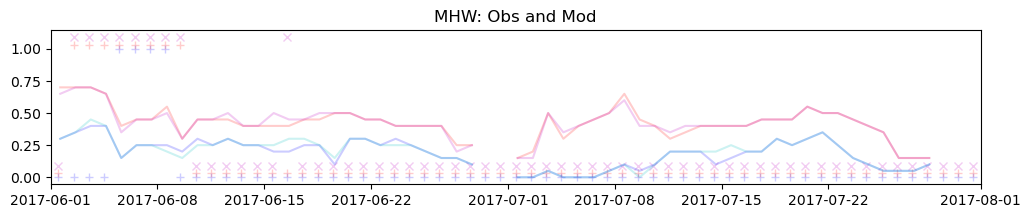

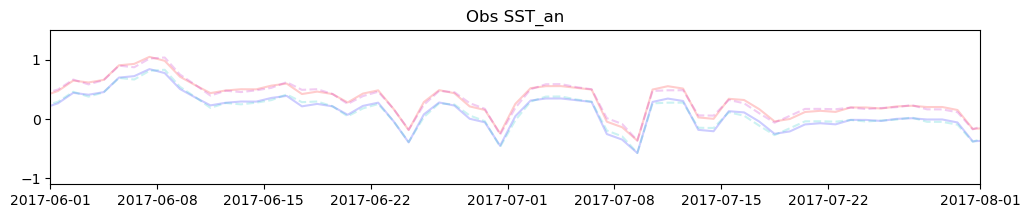

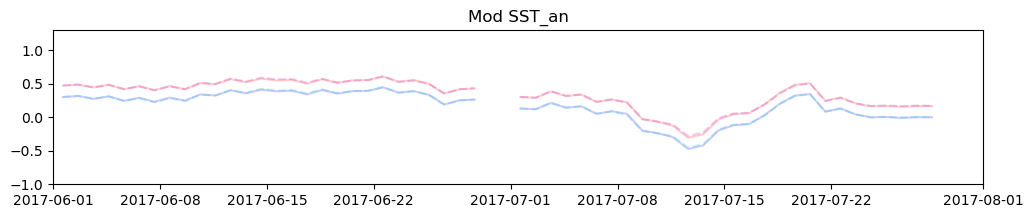

In [17]:
xl=[dt.datetime(2017,6,1),dt.datetime(2017,8,1)]
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod']+0.03,'r+',alpha=.2)
#ax.plot(tobs,mhw['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod']+0.09,'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
ax.set_xlim(xl)
ax.set_title('MHW: Obs and Mod')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c--',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m--',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1.1,1.5)
ax.set_title('Obs SST_an')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1,1.3)
ax.set_title('Mod SST_an')

Text(0.5, 1.0, 'Mod SST_an')

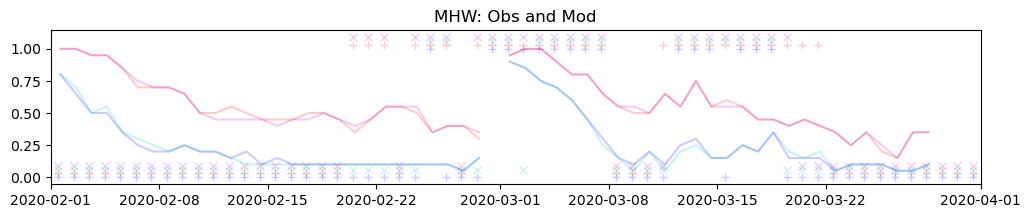

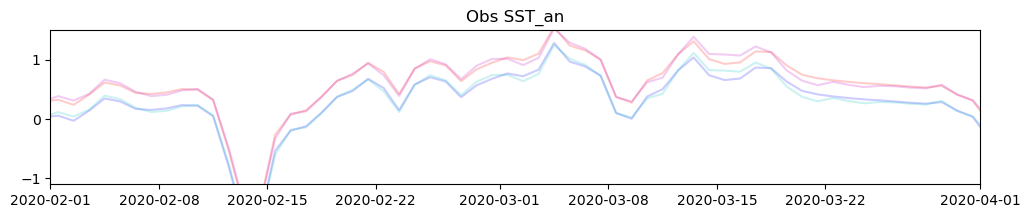

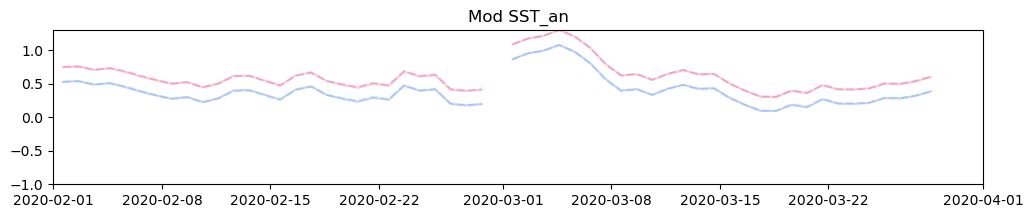

In [18]:
xl=[dt.datetime(2020,2,1),dt.datetime(2020,4,1)]
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,mhw['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(tobs,mhw['obs','sm','nod']+0.03,'r+',alpha=.2)
ax.plot(tobs,mhw['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(tobs,mhw['obs','id','nod']+0.09,'mx',alpha=.2)
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],mhw['mod','sm','det'][:28,ir,],'b-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','sm','nod'][:28,ir],'r-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','det'][:28,ir],'c-',alpha=.2)
    ax.plot(tmod[:28],mhw['mod','id','nod'][:28,ir],'m-',alpha=.2)
ax.set_xlim(xl)
ax.set_title('MHW: Obs and Mod')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tobs,fanom['obs','sm','det']['sst_an'],'b-',alpha=.2)
ax.plot(tobs,fanom['obs','sm','nod']['sst_an'],'r-',alpha=.2)
ax.plot(tobs,fanom['obs','id','det']['sst_an'],'c-',alpha=.2)
ax.plot(tobs,fanom['obs','id','nod']['sst_an'],'m-',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1.1,1.5)
ax.set_title('Obs SST_an')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ie=0
for ir in range(0,378):
    tmod0=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fanom['mod','sm','nod'].reftime.values[ir]))
    tmod=np.array([tmod0+dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].leadtime.values/24])
    ax.plot(tmod[:28],sstan['mod','sm','det'][:28,ir,ie],'b-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','sm','nod'][:28,ir,ie],'r-',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','det'][:28,ir,ie],'c--',alpha=.2)
    ax.plot(tmod[:28],sstan['mod','id','nod'][:28,ir,ie],'m--',alpha=.2)
ax.set_xlim(xl)
ax.set_ylim(-1,1.3)
ax.set_title('Mod SST_an')

calculate SEDI from MHW data sets for each case

## lead 0

In [19]:
# lead 0
np.shape(mhw[('mod','sm','det')])

(100, 378)

In [20]:
tmod_L0=dt.datetime(1993,1,1,0)+np.array([dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].reftime.values])+\
    dt.timedelta(days=float(fanom['mod','sm','nod'].leadtime.values[0]/24))
tmod_L0[0],tmod_L0[-1]

(datetime.datetime(1993, 1, 1, 15, 0), datetime.datetime(2024, 6, 1, 15, 0))

In [21]:
indobs=np.array([True if (el.year>=1993 and (el.year<2024 or (el.year==2024 and el.month<=6)) and el.day==1) else False for el in tobs])

In [22]:
tobs_L0=tobs[indobs]
tobs_L0[0],tobs_L0[-1]

(datetime.datetime(1993, 1, 1, 12, 0), datetime.datetime(2024, 6, 1, 12, 0))

In [23]:
mhw_L0=dict()
mhw_L0[('obs','sm','det')]=mhw[('obs','sm','det')][indobs]
mhw_L0[('obs','sm','nod')]=mhw[('obs','sm','nod')][indobs]
mhw_L0[('obs','id','det')]=mhw[('obs','id','det')][indobs]
mhw_L0[('obs','id','nod')]=mhw[('obs','id','nod')][indobs]

mhw_L0[('mod','sm','det')]=mhw[('mod','sm','det')][0,:]
mhw_L0[('mod','sm','nod')]=mhw[('mod','sm','nod')][0,:]
mhw_L0[('mod','id','det')]=mhw[('mod','id','det')][0,:]
mhw_L0[('mod','id','nod')]=mhw[('mod','id','nod')][0,:]

In [24]:
an_L0=dict()
an_L0[('obs','sm','det')]=sstan[('obs','sm','det')][indobs]
an_L0[('obs','sm','nod')]=sstan[('obs','sm','nod')][indobs]
an_L0[('obs','id','det')]=sstan[('obs','id','det')][indobs]
an_L0[('obs','id','nod')]=sstan[('obs','id','nod')][indobs]

an_L0[('mod','sm','det')]=sstan[('mod','sm','det')][0,:]
an_L0[('mod','sm','nod')]=sstan[('mod','sm','nod')][0,:]
an_L0[('mod','id','det')]=sstan[('mod','id','det')][0,:]
an_L0[('mod','id','nod')]=sstan[('mod','id','nod')][0,:]

In [25]:
Q[('mod','sm','det')][0,:].values

array([0.42242829, 0.51377981, 0.45713602, 0.44733193, 0.3812767 ,
       0.33174771, 0.39527437, 0.42099828, 0.45486031, 0.41660708,
       0.38718457, 0.42345057])

In [26]:
Q[('mod','sm','nod')][0,:].values

array([0.48289258, 0.50309045, 0.49134871, 0.48816744, 0.44977994,
       0.41599514, 0.43758534, 0.45325629, 0.45736721, 0.49570625,
       0.42316074, 0.43092118])

In [27]:
Q[('mod','id','det')][0,:].values

array([0.42328738, 0.5126475 , 0.4546024 , 0.44777014, 0.38244487,
       0.33355097, 0.40024173, 0.42056835, 0.45474747, 0.4196231 ,
       0.38765124, 0.42303145])

In [28]:
Q[('mod','id','nod')][0,:].values

array([0.48775379, 0.50453426, 0.49181149, 0.49175277, 0.4554044 ,
       0.42227033, 0.44253804, 0.45581825, 0.46031281, 0.49728883,
       0.42624756, 0.4314267 ])

In [29]:
Q_L0=dict()
ydo_0=ydobs[indobs]
Q_L0[('obs','sm','det')]=np.array([Q[('obs','sm','det')][iyd] for iyd in ydo_0])
Q_L0[('obs','sm','nod')]=np.array([Q[('obs','sm','nod')][iyd] for iyd in ydo_0])
Q_L0[('obs','id','det')]=np.array([Q[('obs','id','det')][iyd] for iyd in ydo_0])
Q_L0[('obs','id','nod')]=np.array([Q[('obs','id','nod')][iyd] for iyd in ydo_0])

Q_L0[('mod','sm','det')]=Q[('mod','sm','det')][0,:]
Q_L0[('mod','sm','nod')]=Q[('mod','sm','nod')][0,:]
Q_L0[('mod','id','det')]=Q[('mod','id','det')][0,:]
Q_L0[('mod','id','nod')]=Q[('mod','id','nod')][0,:]

Text(0.5, 1.0, 'MHW: Obs and Mod')

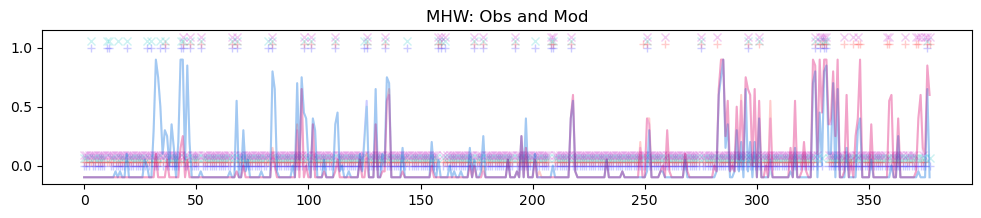

In [30]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(mhw_L0['obs','sm','det']+0.00,'b+',alpha=.2)
ax.plot(mhw_L0['obs','sm','nod']+0.03,'r+',alpha=.2)
ax.plot(mhw_L0['obs','id','det']+0.06,'cx',alpha=.2)
ax.plot(mhw_L0['obs','id','nod']+0.09,'mx',alpha=.2)
###
ax.plot(mhw_L0['mod','sm','det']-.1,'b-',alpha=.2)
ax.plot(mhw_L0['mod','sm','nod']-.1,'r-',alpha=.2)
ax.plot(mhw_L0['mod','id','det']-.1,'c-',alpha=.2)
ax.plot(mhw_L0['mod','id','nod']-.1,'m-',alpha=.2)
ax.set_title('MHW: Obs and Mod')

Text(0.5, 1.0, 'SST An: Obs and Mod')

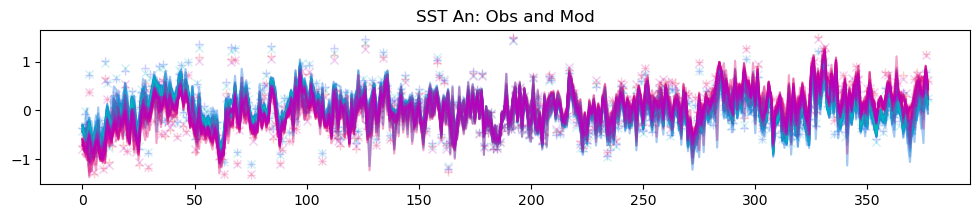

In [31]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(an_L0['obs','sm','det'],'b+',alpha=.2)
ax.plot(an_L0['obs','sm','nod'],'r+',alpha=.2)
ax.plot(an_L0['obs','id','det'],'cx',alpha=.2)
ax.plot(an_L0['obs','id','nod'],'mx',alpha=.2)
###
ax.plot(an_L0['mod','sm','det'],'b-',alpha=.2)
ax.plot(an_L0['mod','sm','nod'],'r-',alpha=.2)
ax.plot(an_L0['mod','id','det'],'c-',alpha=.2)
ax.plot(an_L0['mod','id','nod'],'m-',alpha=.2)
ax.set_title('SST An: Obs and Mod')

Text(0.5, 1.0, 'SST An: Obs and Mod')

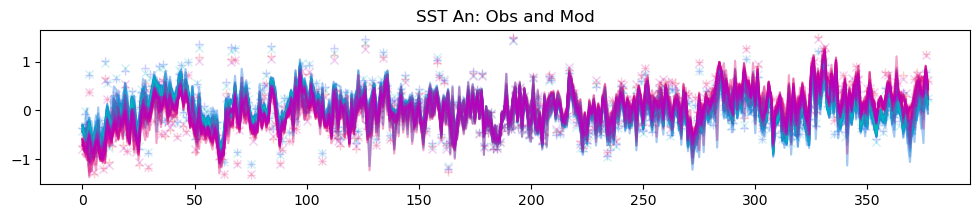

In [32]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(an_L0['obs','sm','det'],'b+',alpha=.2)
ax.plot(an_L0['obs','sm','nod'],'r+',alpha=.2)
ax.plot(an_L0['obs','id','det'],'cx',alpha=.2)
ax.plot(an_L0['obs','id','nod'],'mx',alpha=.2)
###
ax.plot(an_L0['mod','sm','det'],'b-',alpha=.2)
ax.plot(an_L0['mod','sm','nod'],'r-',alpha=.2)
ax.plot(an_L0['mod','id','det'],'c-',alpha=.2)
ax.plot(an_L0['mod','id','nod'],'m-',alpha=.2)
ax.set_title('SST An: Obs and Mod')

In [33]:
def calc_SEDI(mhwfor,mhwobs):
    M=20
    N_pos=20*mhwfor
    N_neg=20-N_pos
    TP=np.where(mhwobs==1,N_pos,0).sum()
    TN=np.where(mhwobs==0,N_neg,0).sum()
    FP=np.where(mhwobs==0,N_pos,0).sum()
    FN=np.where(mhwobs==1,N_neg,0).sum()
    # calculate SEDI, summed over time
    Nobs_pos=np.sum(mhwobs,axis=0)
    Nobs_neg=np.sum(1-mhwobs,axis=0)
    F=FP/(Nobs_neg*M)
    H=TP/(Nobs_pos*M)
    SEDI=(np.log(F)-np.log(H)-np.log(1-F)+np.log(1-H))/(np.log(F)+np.log(H)+np.log(1-F)+np.log(1-H))
    return SEDI,TP,TN,FP,FN

In [34]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','sm','det')],mhw_L0[('obs','sm','det')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.39  TP: 258.0  TN: 6166.0  FP: 258.0 FN: 562.0


In [35]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','sm','nod')],mhw_L0[('obs','sm','nod')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.37  TP: 250.0  TN: 6154.0  FP: 250.0 FN: 610.0


In [36]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','id','det')],mhw_L0[('obs','id','det')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.39  TP: 266.0  TN: 6139.0  FP: 266.0 FN: 594.0


In [37]:
SEDI,TP,TN,FP,FN=calc_SEDI(mhw_L0[('mod','id','nod')],mhw_L0[('obs','id','nod')])
print(f'SEDI: {SEDI:.2f}  TP: {TP}  TN: {TN}  FP: {TP} FN: {FN}')

SEDI: 0.36  TP: 245.0  TN: 6164.0  FP: 245.0 FN: 615.0


In [38]:
def calcdur(MHWseries,dayson=1,daysoff=1):
    # for now, count MHWs that maybe cut off by sampling period
    # assume for now that MHWseries is 1d array, dimension is time in days
    oncount=0
    offcount=0
    MHWdur=0
    istarts=[]
    iends=[]
    durs=[]
    inMHW=False
    # iterate through elements in time series
    for ii, el in enumerate(MHWseries):
        if inMHW: # inMHW=True
            if el:   # MHW+ day while inMHW: reset offcount, increment MHWdur
                MHWdur=MHWdur+1 
                offcount=0
            else:    # MHW- day while inMHW: increment offcount, don't increment MHWdur
                offcount=offcount+1
            if offcount>=daysoff: # offcount surpassed; exit MHW; record iend, MHWdur; reset oncount
                inMHW=False
                iends.append(ii-1) # prior index was last
                durs.append(MHWdur)
                MHWdur=0
                oncount=0
        else:     # inMHW=False
            if el:   # MHW+ day while not inMHW: increment oncount
                oncount=oncount+1 # previously not in MHW, MHW+ day
            else:    # MHW- day while not inMHW: oncount=0
                oncount=0
            if oncount>=dayson: # if oncount surpassed, enter MHW; increment MHWdur; record istart; reset offcount
                inMHW=True # switch to inMHW=True
                MHWdur=oncount # oncount MHWdays have occurred
                istarts.append(ii)
                offcount=0
    # if series ended in MHW, record last (partial) MHW:
    if inMHW:
        iends.append(ii) # index has not been incremented beyond final value
        durs.append(MHWdur)
    return np.array(istarts), np.array(iends), np.array(durs)

In [39]:
indstarts,indends,MHWdurs=calcdur(mhw['obs','sm','nod'])

In [40]:
indstarts, indends,MHWdurs

(array([   37,   106,   115,   143,   201,   474,   492,   856,  1172,
         1179,  1195,  1312,  1327,  1418,  1437,  1582,  1588,  1592,
         1631,  1636,  1655,  1668,  1677,  1692,  1694,  1731,  1737,
         1748,  1766,  1771,  1776,  1822,  1825,  1853,  1931,  1996,
         2002,  2023,  2031,  2049,  2070,  2080,  2106,  2146,  2160,
         2165,  2169,  2185,  2230,  2304,  2309,  2319,  2504,  2529,
         2555,  2577,  2737,  2754,  2777,  2797,  2810,  2845,  2868,
         2870,  2872,  2889,  2898,  2907,  2933,  2959,  3017,  3031,
         3140,  3167,  3227,  3277,  3287,  3294,  3300,  3331,  3336,
         3357,  3363,  3366,  3369,  3472,  3504,  3553,  3576,  3604,
         3611,  3632,  3662,  3669,  3671,  3679,  3688,  3705,  3719,
         3786,  3798,  3803,  3810,  3817,  3863,  3981,  4053,  4066,
         4130,  4138,  4142,  4146,  4156,  4165,  4204,  4208,  4224,
         4283,  4303,  4320,  4328,  4365,  4373,  4377,  4410,  4480,
      

In [41]:
np.mean(MHWdurs)

np.float64(3.6149584487534625)

In [42]:
indstarts2,indends2,MHWdurs2=calcdur(mhw['obs','sm','nod'],2,2)

In [43]:
indstarts2,indends2,MHWdurs2

(array([  116,   144,   202,   493,  1180,  1419,  1438,  1583,  1589,
         1637,  1656,  1669,  1678,  1695,  1732,  1738,  1749,  1767,
         1772,  1777,  1823,  1932,  1997,  2003,  2024,  2032,  2050,
         2071,  2081,  2107,  2147,  2161,  2166,  2231,  2310,  2530,
         2738,  2755,  2778,  2798,  2846,  2873,  2899,  2908,  2934,
         2960,  3228,  3278,  3288,  3301,  3332,  3337,  3358,  3364,
         3473,  3505,  3577,  3605,  3633,  3663,  3672,  3680,  3689,
         3706,  3720,  3787,  3799,  3818,  3864,  4067,  4131,  4143,
         4147,  4157,  4225,  4304,  4329,  4366,  4374,  4411,  4483,
         4505,  4533,  4563,  4663,  4681,  4756,  4766,  4809,  4829,
         4845,  4858,  4934,  5103,  5159,  5183,  5193,  5310,  5373,
         5393,  5409,  5476,  5517,  5523,  5537,  5568,  5621,  5633,
         5826,  5832,  5943,  5949,  6023,  6079,  6092,  6143,  6434,
         6575,  6584,  6593,  6850,  7061,  7081,  7100,  7129,  7294,
      

In [44]:
np.mean(MHWdurs2)

np.float64(5.238095238095238)

In [45]:
indstarts3,indends3,MHWdurs3=calcdur(mhw['obs','sm','nod'],3,3)

In [46]:
np.mean(MHWdurs3)

np.float64(7.547445255474453)

In [47]:
len(MHWdurs),len(MHWdurs2),len(MHWdurs3)

(361, 231, 137)